# Исследования истории продаж игр

  **Описание проекта:**
  
  Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. 
 
  Перед нами данные до 2016 года. Сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными.
 
  В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
  
  **Постановка задачи:**
  
  Используя исторические данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы, выявить закономерности, определяющие успешность игры 
  
  **Описание данных:**
  
 * Name — название игры
 * Platform — платформа
 * Year_of_Release — год выпуска
 * Genre — жанр игры
 * NA_sales — продажи в Северной Америке (миллионы проданных копий)
 * EU_sales — продажи в Европе (миллионы проданных копий)
 * JP_sales — продажи в Японии (миллионы проданных копий)
 * Other_sales — продажи в других странах (миллионы проданных копий)
 * Critic_Score — оценка критиков (максимум 100)
 * User_Score — оценка пользователей (максимум 10)
 * Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
 
Данные за 2016 год могут быть неполными.

**Исследование пройдет в 6 этапов:**
 1) Загрузка данных
 2) Предобработка данных
     - 2.1 Обработаем названия столбцов.
     - 2.2 Выведем пропуски
     - 2.3 Поиск и обработка дубликатов, пропусков
     - 2.4 Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец.
 3) Исследовательский анализ данных, с потроением графиков и таблиц
     - 3.1 Посмотрим сколько игр выпускалось в разные годы
     - 3.2 Посмотрим как менялись продажи по платформам
     - 3.3 Посмотрим, сколько в среднем существует одна платформа
     - 3.4 Выделим актуальный период продажи
     - 3.5 Посмотрим какие платформы лидируют по продажам, растут или падают
     - 3.6 Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам
     - 3.7 Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами
     - 3.8 Посмотрим на общее распределение игр по жанрам.
 4) Составим портрет данных для каждого региона
     - 4.1 Самые популярные платформы (топ-5).
     - 4.2 Самые популярные жанры (топ-5).
     - 4.3 Узнаем влияет ли рейтинг ESRB на продажи в отдельном регионе.
 5) Проверим гипотезы
     - 5.1 О том что средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
     - 5.2 О том что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
 6) Составим вывод и рекомендации

## <font color='DarkBlue'><b>Шаг 1.  Загрузка данных</b></font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import missingno as msno
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
data = pd.read_csv('games.csv')

In [3]:
display(data.head(),
        data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


None

In [4]:
size_data_frame_start = len(data)
print('Размер полученного файла:', size_data_frame_start)

Размер полученного файла: 16715


**Загрузили все модули, дальшее загругризили файл для работы. Размер файла составялет 16715 строчек. После выведения информаии о файле, видны пропуски в Critic_Score, User_Score, Rating и небольшие пропуски в Name, Genre**

## <font color='DarkBlue'><b>Шаг 2. Предобработка данных</b></font>

**План:**
- 2.1 Обработаем названия столбцов.
- 2.2 Выведем пропуски
- 2.3 Поиск и обработка дубликатов, пропусков
- 2.4 Поменяем тип данных
- 2.5 Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец.
- Выводы по Предобработке данных

### <font color='DarkBlue'><b>2.1 Обработаем названия столбцов.</b></font>

- *Применяем нижний регистр к названиям столбцов, для удобства обращения к ним:*

In [5]:
data.columns = data.columns.str.lower()

### <font color='DarkBlue'><b>2.2 Выводим пропуски</b></font>

 - *Проверяем наличие пропусков, которые мы уже видели ранее при вызове метода info():*

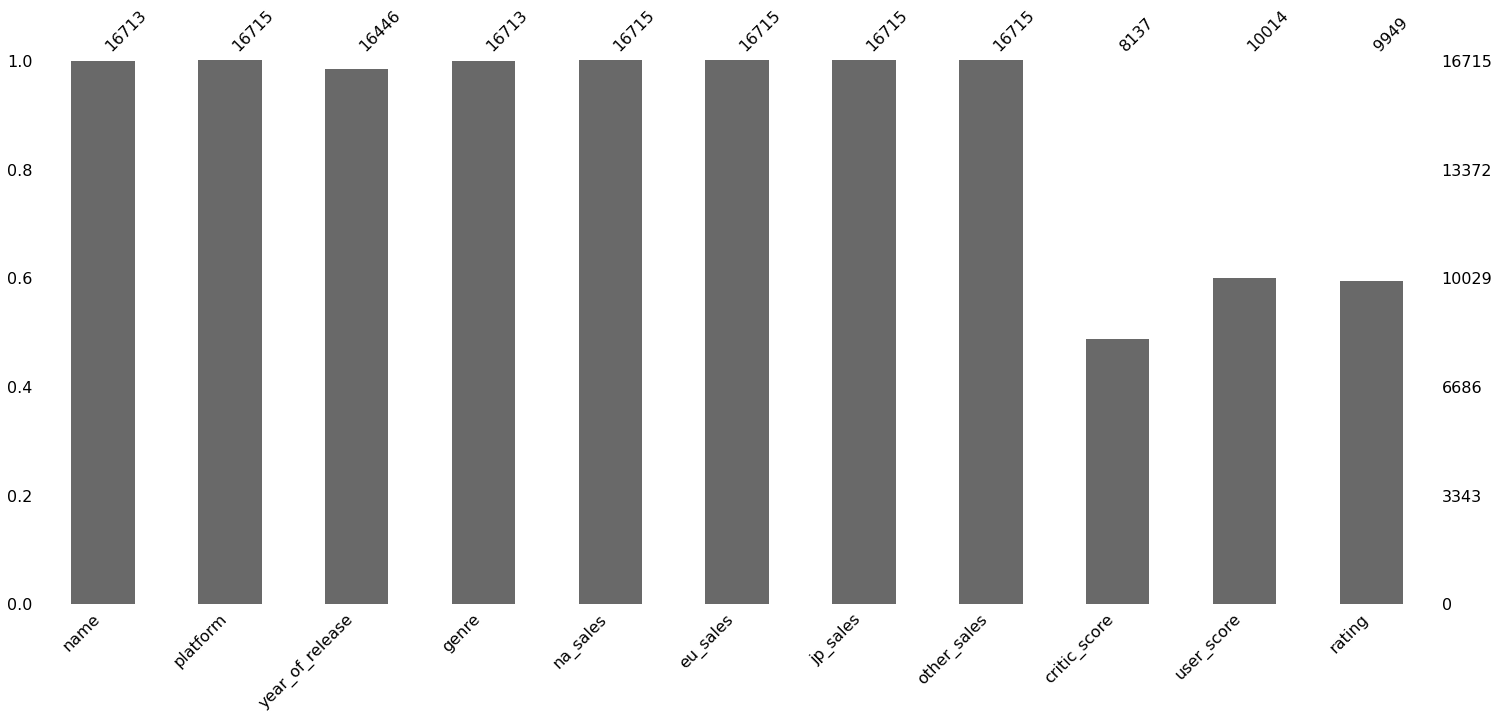

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [6]:
msno.bar(data)
plt.show()
data.isna().sum()

 - **В результате видим большое кол-во пропусков в столбцах critic_score и user_score, а так же в rating.** 
 - **По 2 пропуска в столбцах name и genre.** 
 - **269 пропусков в столбце year_of release**

### <font color='DarkBlue'><b>2.3 Выявляем и обрабатываем дубликаты, пропуски</b></font>

 - *Проверка на наличие дубликатов:*

In [7]:
display(data.duplicated().sum(),
        data[data.duplicated(subset=['name', 'year_of_release', 'platform'])])

0

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


**Явных дубликатов нет, а вот неявных дубликатов целых два, их стоит удалить.**

In [8]:
data = data.drop(index = [16230,15957,14244])

**Удалили строки с дубликатами и удалили строку под номером 15957, т.к. в ходе анализа выяснили что это значение является ошибкой.**

 - *Удаляем значения nan из столбца year_of_release и перепроверяем:*

In [9]:
percent_miss_years = round(data.year_of_release.isna().sum() / len(data), 3)
print(f'Процент пропусков в столбце year_of_release: {percent_miss_years:.1%}')
data = data[~np.isnan (data.year_of_release)]
data.year_of_release.isna().sum()

Процент пропусков в столбце year_of_release: 1.6%


0

**Т.е. мы не можем самостоятельно заменить пропуски на года, принимаем решение удалить их. Т.к. их всего 269, это 1.6% от всего датафрейма, это не большой процент, не исказит исследовательский анализ**

 - *Проверяем наличие пропусков в столбце name:*

In [10]:
data[data.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


 - *Удаляем пропуски в столбце name и перепроверяем:*

In [11]:
data = data.dropna(subset=['name'])
data.name.isna().sum()

0

**Удаляем эту строку, т.к. мы не можем сами заполнить название игры. Т.к. она всего одна.**

- *Выводим уникальные значения в поисках значений аномальных, пропущеных значений:*

In [12]:
display(data.critic_score.unique(),
        data.user_score.unique(),
        data.rating.unique())

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

**Видим что значение nan есть во всех значениях, это значит что там пропуски. Так же есть значение tbd, в оценке пользователей. Дальше выделим эти значения отдельно и посмотрим что они значат.**

 - *Заполним пропуски в оценках критиков и пользователей:*

In [13]:
data.critic_score.fillna(-1, inplace=True)
data.user_score.fillna(-1, inplace=True)
data.loc[data.user_score == 'tbd', 'user_score'] = -1

**Заполнить сами эти значения мы не можем, прибегаем к "заглушкам", т.е. к таким значениям которые не перекроют значения которые уже есть, так к примеру если заполнить значения нулями, то мы можем перекрыть другие значения и когда будем филтровать по значению 0, мы отсечем и действующие оценки**

 - *Заменяем значения в рейтинге на tbd:*

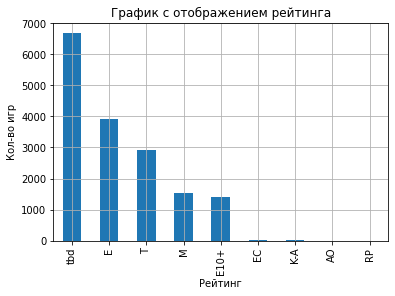

In [14]:
data.rating.fillna('tbd', inplace=True)
data['rating'].value_counts().plot(kind='bar', grid=True, ylabel='Кол-во игр', xlabel='Рейтинг')
plt.title('График с отображением рейтинга')
plt.show()

**На графике видно, что большая часть игр под значением `tbd`, т.е. игры выпускались вне США и Канады. Категории в порядке убывания:**
 - **E - Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика.**
 - **T - Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия.**
 - **M - Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков.**
 - **E10+ - Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей.**
 
**Исходя из этих определений, можно понять что значимая часть игр за весь период делается для всех возрастных категорий, без элементов насилия и пугающих сцен.**

 - *Сделали срез под измененные значения tbd на -1 и построили график:*

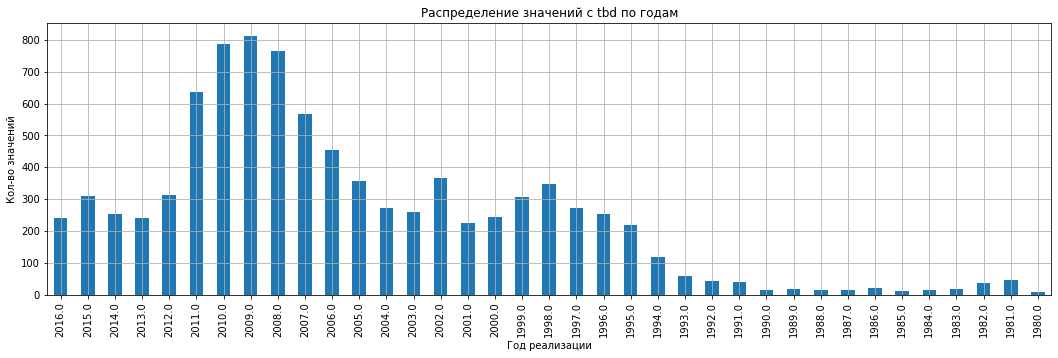

In [15]:
tbd_user_score = data.query('user_score == -1')
(tbd_user_score.year_of_release
               .value_counts()
               .sort_index(ascending=False)
               .plot(kind='bar', figsize=(18,5), grid=True, xlabel='Год реализации', ylabel='Кол-во значений')
               .set(title='Распределение значений с tbd по годам')
              
)
plt.show()

**Больше всего игр с оценкой tbd пришлось на 2008-2011 год. Значительный спад с 2012 года по 2016 год. В поисках понимание того, что такое tbd значение, нашел этому определение как to be decided. Используется, если какая-то информация еще не определена или решение по вопросу не принято. Т.е. на момент выхода игры, еще не было оценок, а дальше возможно не внесли в базу данных.**

**Рейтинг ESRB определяет наиболее подходящую возрастную категорию для игры. Исходя из данных википедии этот рейтинг локализируется в США и Канаде, а игры издаются и в других странах, возможно поэтому в других играх эти значения отсутствуют, т.к. игра была создана не в США или Канаде. Можем заменить эти значения, на значения tbd - т.е. не определены. Для Великобритании и большинство европейских стран существует система PEGI.**

### <font color='DarkBlue'><b>2.4 Поменяем тип данных</b></font>

 - *Меняем тип данных и выводим информацию, что бы убедиться в том что тип данных поменялся:*

In [16]:
data.user_score = data.user_score.astype('float64')
data.year_of_release = data.year_of_release.astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16442 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16442 non-null  object 
 1   platform         16442 non-null  object 
 2   year_of_release  16442 non-null  int64  
 3   genre            16442 non-null  object 
 4   na_sales         16442 non-null  float64
 5   eu_sales         16442 non-null  float64
 6   jp_sales         16442 non-null  float64
 7   other_sales      16442 non-null  float64
 8   critic_score     16442 non-null  float64
 9   user_score       16442 non-null  float64
 10  rating           16442 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


**Т.к. `user_score` имеет дробное значение и его нужно перевести из типа object, что бы в будующем не возникало проблем с обработкой этого столбца, поменяли тип данных в `user_score` и `year_of_release` на дробный и целочисленный соответственно.**

### <font color='DarkBlue'><b>2.5 Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец.</b></font>

 - *Создаем столбец с общим заработков по всем 3 регионам и сумируем общие доходы каждой игры:*

In [17]:
data['total_sales'] = data.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,tbd,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,tbd,31.38


 - *Перепроверим столбцы в которых были пропуски, на наличие пропусков:*

In [18]:
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16442 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16442 non-null  object 
 1   platform         16442 non-null  object 
 2   year_of_release  16442 non-null  int64  
 3   genre            16442 non-null  object 
 4   na_sales         16442 non-null  float64
 5   eu_sales         16442 non-null  float64
 6   jp_sales         16442 non-null  float64
 7   other_sales      16442 non-null  float64
 8   critic_score     16442 non-null  float64
 9   user_score       16442 non-null  float64
 10  rating           16442 non-null  object 
 11  total_sales      16442 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
name : ко

**Видим что все пропуски обработаны корректно**

### <font color='DarkBlue'><b>Выводы:</b></font>

 - Обработали названия столбцов, привели к нижнему регистру.
 - Просмотрели наличия пропусков, в столбце year_of_release	нашли и удалили отсутствующие значения, т.к. возможности заменить их нет, т.к. это 1.6% - допустимое значение для удаления. Удалили 2 строки с отсутствующим названием игры, тут мы тоже не можем заполнить, т.к. не имеем такой возможности.critic_score, user_score оставили заполнили 'заглушкой', т.к. если не обработать пропуски, то в дальнейшем не будет возможности корректно исследовать эти столбцы. Столбец rating, заменили пропуски на tbd, обозначает как не имеем данных.
 - Построили график с значениями tbd в столбце user_score и определили как значения которые не были приняты на момент выхода игры или же на момент заполнения графика, поэтому значения так и остались tbd.
 - Построили график с рейтингом игр за весь период.
 - Преобразовали один тип данных year_of_release и user_score на более удобные типы данных.
 - Посчитали суммарные продажи во всех регионах и добавили их в отельный столбец.
 - Перепроверили наличие пропусков

## <font color='DarkBlue'><b> Шаг 3. Исследовательский анализ данных</b></font>

- 3.1 Посмотрим сколько игр выпускалось в разные годы
- 3.2 Посмотрим как менялись продажи по платформам
- 3.3 Посмотрим, сколько в среднем существует одна платформа
- 3.4 Выделим актуальный период продажи
- 3.5 Посмотрим какие платформы лидируют по продажам, растут или падают
- 3.6 Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам
- 3.7 Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами
- 3.8 Посмотрим на общее распределение игр по жанрам.

### <font color='DarkBlue'><b>3.1 Посмотрим сколько игр выпускалось в разные годы</b></font>

 - *Делаем сводную таблицу по кол-ву игр и их соотношение по годам:*

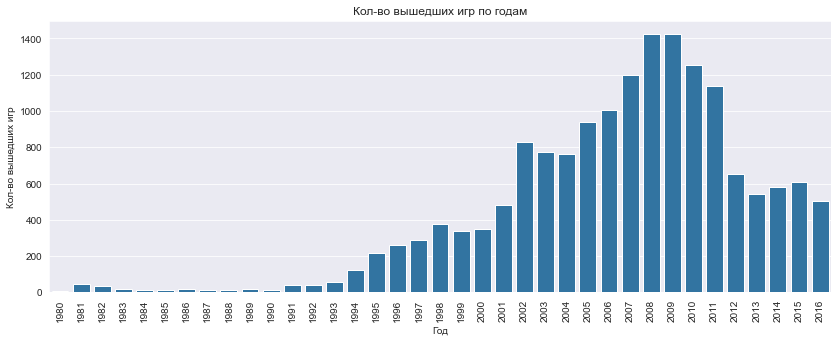

In [19]:
count_games = (data.pivot_table(index=['year_of_release'],
                    values='name', aggfunc = 'count')
                    .reset_index())
count_games.columns = ['year_of_release', 'count_games']

sns.set_style("darkgrid")
plt.figure(figsize=(14, 5))
(sns.barplot(data=count_games , x='year_of_release', y='count_games')
            .set(title='Кол-во вышедших игр по годам', xlabel='Год', ylabel='Кол-во вышедших игр'))
plt.xticks(rotation=90)
plt.show()

**До 1993 года игры очень почти не выпускались, начиная с 1994 года начался рост до 1997 года, далее видим плато и c 2002 снова подьемы до 2007 года. В 2008 и 2009 году больше всего выпускалось игр. Далее идет спад и мы видим что к нынешнему 2016 году, индустрия игр находится на уровне 2001 года. Видно что каждые 4-5 лет меняется темп продаж, так видно 2002-2006 примерно одинаковые продажи, далее с 2007-2011 идет рост, дальше с 2012 до 2016 снова спад, исходя из этого, можем предположить что в 2017 году будет рост**

 - *Делаем сводную таблицу на основании их общих заработков и выводим на диаграмму:*

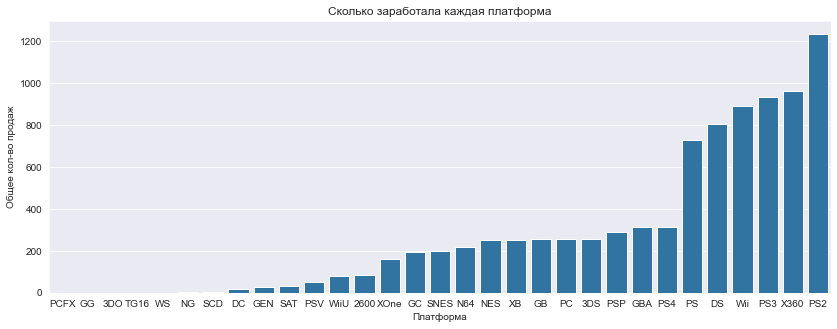

In [20]:
total_sales = (data.pivot_table(index='platform',values='total_sales', aggfunc = ['count','sum'])
                   .reset_index())
total_sales.columns = ['platform', 'count_games','total_sales']
total_sales = total_sales.sort_values(by=('total_sales'), ascending=True)

plt.figure(figsize=(14, 5))
(sns.barplot(data=total_sales, x='platform', y='total_sales')
            .set(title='Сколько заработала каждая платформа', xlabel='Платформа', ylabel='Общее кол-во продаж'))
plt.show()
top_platforms = total_sales.tail(6)

**В общей картине лидирует платформы `PS2`, на 2-3 месте рядом стоят `X360` и `PS3`, на 4 месте `Wii`, на 5 месте `DS` и на 6 месте `PS`, дальше с 7 места идет резкий спад. Можно сделать вывод о том, что платформы `PS` имеют устойчивые продажи. Скорее всего `PS2` это более старая платформа и соответственно `PS3` и `PS4` более поздние, поэтому `PS4` в общей картине так сильно остает от 6ки лидеров**

### <font color='DarkBlue'><b>3.2 Посмотрим как менялись продажи по платформам</b></font>

 - *Для каждой из этих платформ построили графики:*

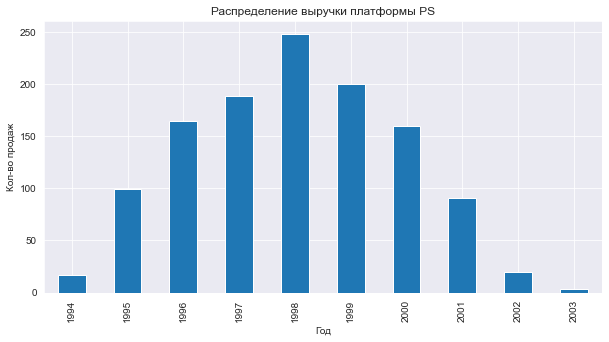

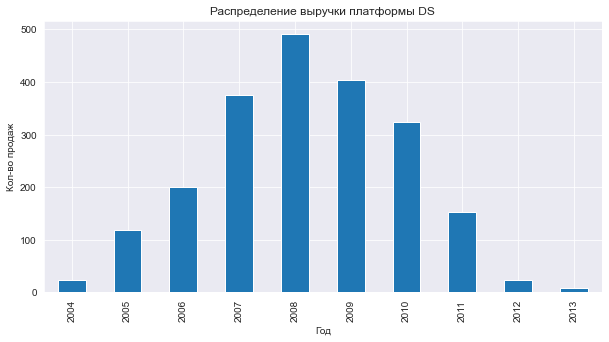

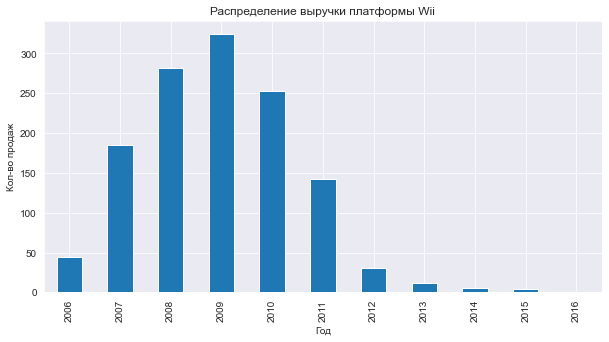

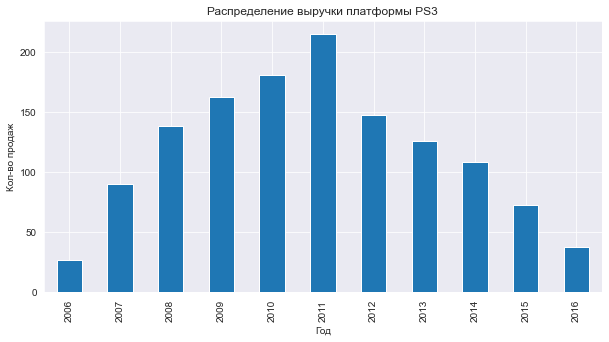

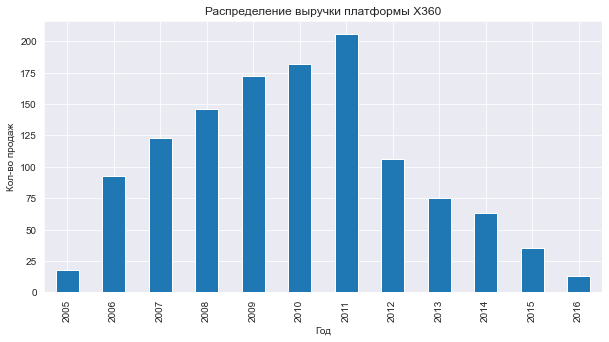

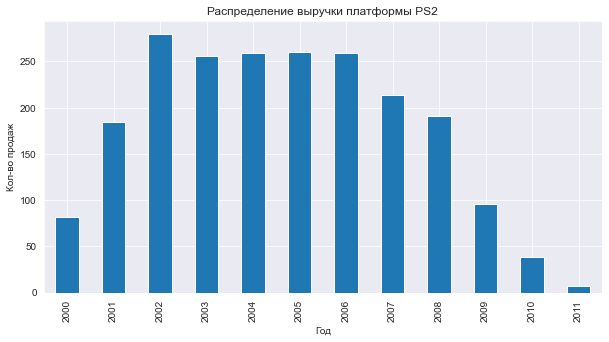

In [21]:
for i in top_platforms.platform.unique():
    each_platform = data[data['platform'] == i]    
    (each_platform.year_of_release
                  .value_counts()
                  .sort_index(ascending=True)
                  .plot(kind='bar' ,figsize=(10,5), grid=True, xlabel='Год', ylabel='Кол-во продаж')
                  .set(title=(f'Распределение выручки платформы {i}')))
    plt.show()

**3 платформы из 6 уже не актуальный на данный момент, если брать актуальный срок размером 4-5 лет. Одна из платформ показывает очень низкие показатели продаж за последние 4 года. Есть платформы `Wii` которая попадает под актуальный период но имеет очень низкий уровень продаж. В итоге остается 2 платформы которые актуальны сейчас и имеют хорошие продажи, это `X360` и `PS3`. Так же видим у этих двух платформ планомерное падение продаж с 2011 года.**

### <font color='DarkBlue'><b>3.3 Посмотрим, сколько в среднем существует одна платформа</b></font>

 - *Строим график где можно отследить на каком промежутке времени существовала та или иная платформа:*

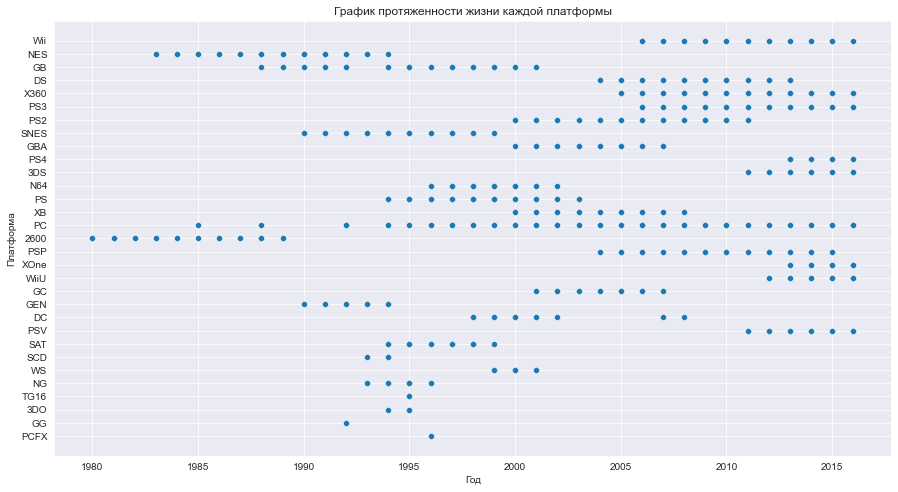

In [22]:
plt.figure(figsize=(15, 8))
sns.set_style('darkgrid')
sns.scatterplot(x='year_of_release', 
                y='platform',
                data=data,
                sizes=(10, 350)).set(title='График протяженности жизни каждой платформы', 
                                     xlabel='Год', 
                                     ylabel='Платформа')
plt.show()

**Исходя из этого графика можно увидеть, когда прекращала свое существование платформа, в следующих год за ней создавалась новая, соразмерная той что перестала существовать**

 - *Удаляем все дубликаты в годах и платформах, что бы оставить по 1му значения и посчитать сколько лет существовала платформа на рынке:*

In [23]:
count_years_each_platform = (data.loc[:,['year_of_release', 'platform']]
        .drop_duplicates()
        .pivot_table(index='platform', values='year_of_release', aggfunc='count')
        .reset_index()
        .sort_values(by='year_of_release', ascending=True)
       )
count_years_each_platform.columns = ['platform', 'avg_time']

 - *Строим график и считаем среднюю продолжительноть жизни:*

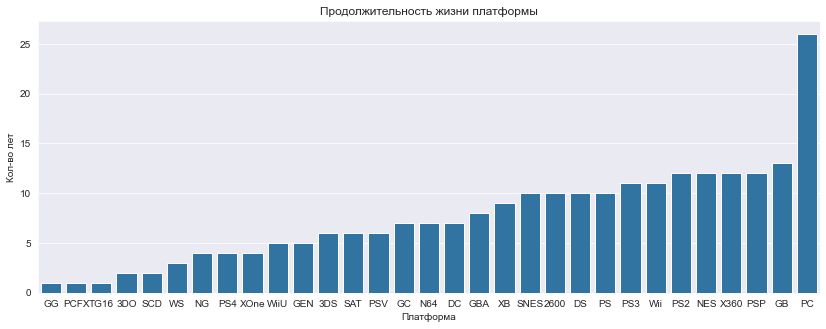

Средний срок, на протяжении которого живет платформа: 7.0


In [24]:
plt.figure(figsize=(14, 5))
(sns.barplot(data=count_years_each_platform, x='platform', y='avg_time')
            .set(title='Продолжительность жизни платформы', xlabel='Платформа', ylabel='Кол-во лет'))
plt.show()
print('Средний срок, на протяжении которого живет платформа:', round(count_years_each_platform.avg_time.median(), 1))

**Средний срок жизни одной платформы 7 лет. Как мы уже увидели из графика выше, закономерность того, как только прекращает существование одна из платформ, на ее место приходит другая. Платформа PC самая долгоживущая из всех, целых 26 лет, это в  2-3 раза больше чем все другие платформы по-отдельности. Топовые платформы живут порядка 10 лет.**

### <font color='DarkBlue'><b>3.4 Выделим актуальный период продажи</b></font>

 - *Создаем новый датафрейм, с актуальными годами, те что выше 2011 года и перепроверяем что выбрали нужные:*

In [25]:
actual_data = data.query('year_of_release > 2011')
actual_data.year_of_release.unique()
actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,tbd,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,tbd,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


### <font color='DarkBlue'><b>3.5 Посмотрим какие платформы лидируют по продажам, растут или падают</b></font>

 - *Строим график для всех компаний, что бы отследить падения и рост платформ:*

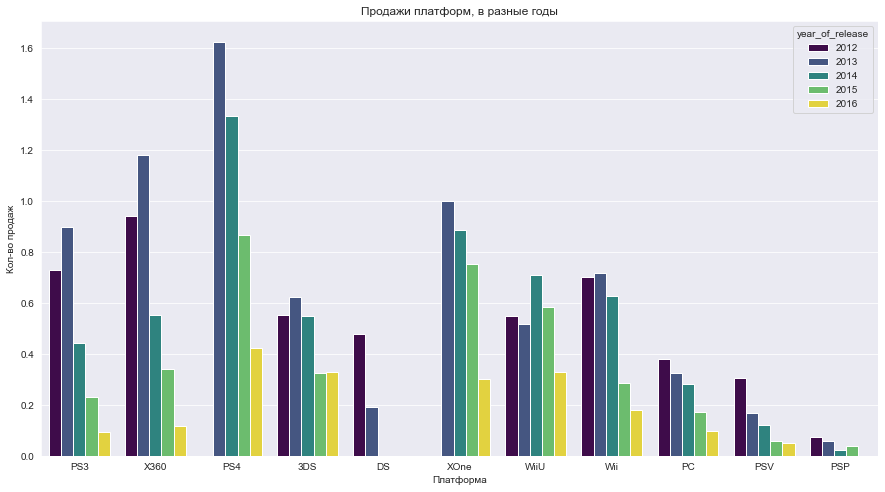

In [26]:
plt.figure(figsize=(15, 8))
(sns.barplot(x='platform', y='total_sales', 
             data=actual_data, 
             hue='year_of_release', 
             errorbar=None, 
             palette='viridis').set(title='Продажи платформ, в разные годы', 
                                    xlabel='Платформа', 
                                    ylabel='Кол-во продаж'))
plt.show()

**Почти все платформы показывают спад продаж, начиная с 2013 года. В 2013 году многие платформы показывали свои лучшие показатели продажи. Самая крупная платформа `PS4`, самая маленькая `PSP`. Более стабильные показатели имеет платформа `WiiU`, их выручка не такая больщая в сравнении с некоторыми платформами, но в целом они в среднем показывают хорошие результаты и если брать отдельно 2016 год, то они показывают 2 показатель по выручке наровне с `3DS` и немного уступая самой крупной платформе `PS4`**

 - *Делаем своднуб таблицу и смотрим самые крупные платформы по общей выручке:*

In [27]:
actual_total_sales = (actual_data.pivot_table(index='platform',values='total_sales', aggfunc = 'sum')
                                 .sort_values(by=('total_sales'), ascending=True)
                                 .reset_index())

 - *Построим распределение по всем регионам, что бы в дальнейшем сравнить с определенными регионами:*

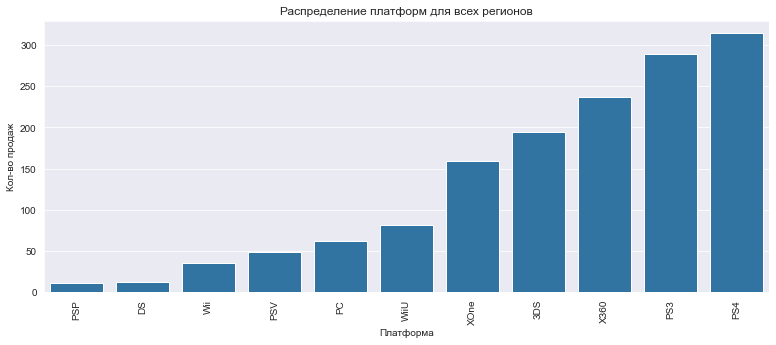

In [28]:
plt.figure(figsize=(13, 5))
(sns.barplot(data=actual_total_sales,
             x='platform', 
             y='total_sales').set(title='Распределение платформ для всех регионов', 
                                  xlabel='Платформа',
                                  ylabel='Кол-во продаж'))
plt.xticks(rotation=90)
plt.show()

**Половину всего рынка забирают на себя платформы `PS3` и `PS4`, с небольшим отрывом между друг другом. На 3 месте платформа `X360` которая уступает по продажам примерно на 70млн. На 3 и 4 месте `XOne` и `3DS`**

### <font color='DarkBlue'><b>3.6 Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам</b></font>

 - *Строим "ящик с усами" что бы посмотреть аномальные значения и в целом разброс прибыли:*

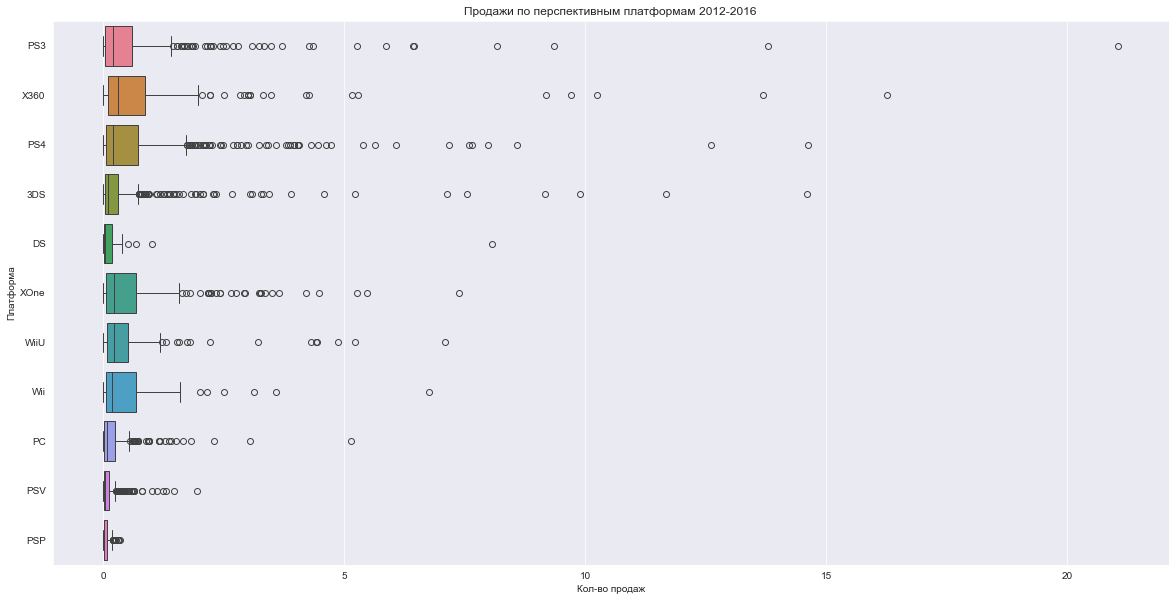

In [29]:
plt.figure(figsize=(20, 10))
sns.set_style('darkgrid')
(sns.boxplot(x='total_sales', 
             y='platform',
             hue='platform',
             data=actual_data).set(title='Продажи по перспективным платформам 2012-2016',
                                  xlabel='Кол-во продаж',
                                  ylabel='Платформа'))
plt.show()

**У большинства платформ, есть такие игры которые приносили больше 5млн продаж. У `PS3` и `X360` есть аномально выделяющаяся игра, которая сильно 'выстрелила' и  принесла больше 15 млн продаж, т.е. не факт что эти платформы стабильно приносят прибыль на протяжении многих лет, будем дальше выяснять это. Так же можно наблюдать  большой разброс после 10млн продаж.**

 - *Построим более детальный график "Ящика с усами" :*

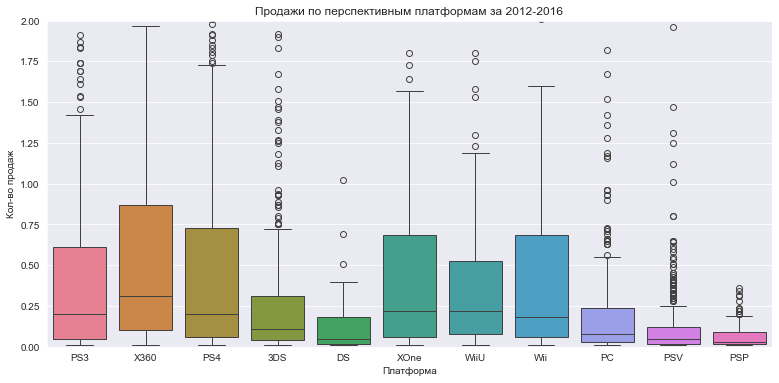

In [30]:
plt.figure(figsize=(13, 6))
(sns.boxplot(x='platform',
             y='total_sales',
             hue='platform',
             data=actual_data).set(title='Продажи по перспективным платформам за 2012-2016',
                                  xlabel='Платформа',
                                  ylabel='Кол-во продаж'))
plt.ylim(0,2)
plt.show()

**Когда мы уменьшили масштаб графика, видно что лидирующие по общему продажи `PS3` и `PS4` в среднем меньше продают игры нежели платформа `X360`. Платформа `X360` имеет самую большую медиану и боксплот захватывает больший диапазон, нежели другие.Так же платформы `XOne` и `Wii`, имеют медианное значения примерно такое же как у `PS3` и `PS4`, хотя в общем кол-ве продаж `XOne` и `Wii` значительно уступают. Скорее всего это из-за аномальных значений, которые сильно перетягивают общие продажи. Но в срезе медианы, они имеют одинаковое значени.**

 - *Делаем срез игр которые принесли более 10млн продаж:*

In [31]:
actual_data.query('total_sales > 10')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,tbd,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,tbd,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,tbd,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24


### <font color='DarkBlue'><b>3.7 Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами</b></font>

 - *Строим график отражающий корреляцию между продажами и оценками:*

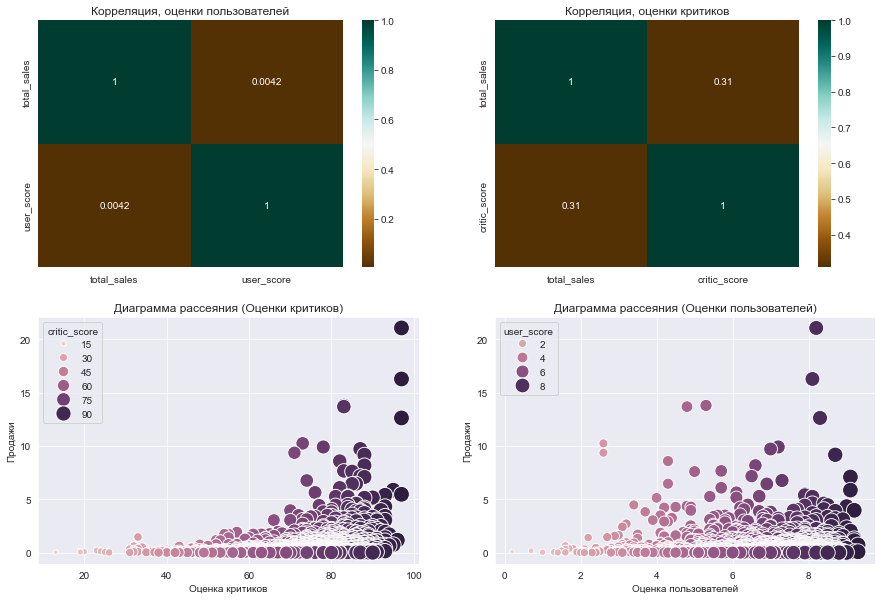

In [32]:
fig, axis = plt.subplots(2,2, figsize=(15,10))
user_score_query = actual_data.query('user_score != -1')
critic_score_query = actual_data.query('critic_score != -1')

(sns.heatmap(user_score_query.loc[:,['total_sales', 'user_score']]
             .corr(),annot=True,ax=axis[0,0],cmap='BrBG')
             .set(title='Корреляция, оценки пользователей'))

(sns.heatmap(critic_score_query.loc[:,['total_sales', 'critic_score']]
             .corr(),annot=True,ax=axis[0,1],cmap='BrBG')
             .set_title('Корреляция, оценки критиков'))

(sns.scatterplot(x='critic_score',y='total_sales', 
                hue='critic_score', size = 'critic_score', 
                sizes=(20,250), data=critic_score_query,
                ax=axis[1,0])
                .set(title='Диаграмма рассеяния (Оценки критиков)',xlabel='Оценка критиков', ylabel='Продажи'))
(sns.scatterplot(x='user_score',y='total_sales', 
                hue='user_score', size='user_score', 
                sizes=(20,250), data=user_score_query,
                ax=axis[1,1]) 
                .set(title='Диаграмма рассеяния (Оценки пользователей)', xlabel='Оценка пользователей',ylabel='Продажи'))
plt.show()

**Корелляция для всех платформ между `оценками пользователей` близится к 0, это значит что ее практически нет, составляет `0.0042`, между `оценками критиков` и продажами средняя зависимость, составляет `0.31` , т.е. чем больше это значени тем сильнее зависимость между сравниваемыми показателями**

 - *Функция для создания корреляций:*

In [33]:
def corr_func (platform_name):

    user_score_query = actual_data.query('platform == @platform_name & user_score != -1')
    critic_score_query = actual_data.query('platform == @platform_name & critic_score != -1')
    
    fig, axis = plt.subplots(2,2, figsize=(15,10))
    
    
    (sns.heatmap(user_score_query.loc[:,['total_sales', 'user_score']]
                 .corr(), annot=True, ax=axis[0,0], cmap='BrBG')
                 .set_title(f'Корреляций оценки пользователей {platform_name}'))
    (sns.heatmap(critic_score_query.loc[:,['total_sales', 'critic_score']]
                 .corr(), annot=True, ax=axis[0,1], cmap='BrBG')
                 .set_title(f'Корреляция оценки критиков {platform_name}'))
    
    (sns.scatterplot(x='user_score', y='total_sales',
                    hue='user_score', size='user_score', 
                    sizes=(20,350), data = user_score_query,ax=axis[1,0]) 
                    .set(title=f'Оценки пользователей {platform_name}', xlabel='Оценка пользователей', ylabel='Продажи'))
    (sns.scatterplot(x='critic_score', y='total_sales', 
                    hue='critic_score', size='critic_score', 
                    sizes=(20,350), data = critic_score_query,ax=axis[1,1])
                   .set(title=f'Оценки критиков {platform_name}', xlabel='Оценка Критиков', ylabel='Продажи'))
   
    plt.show()


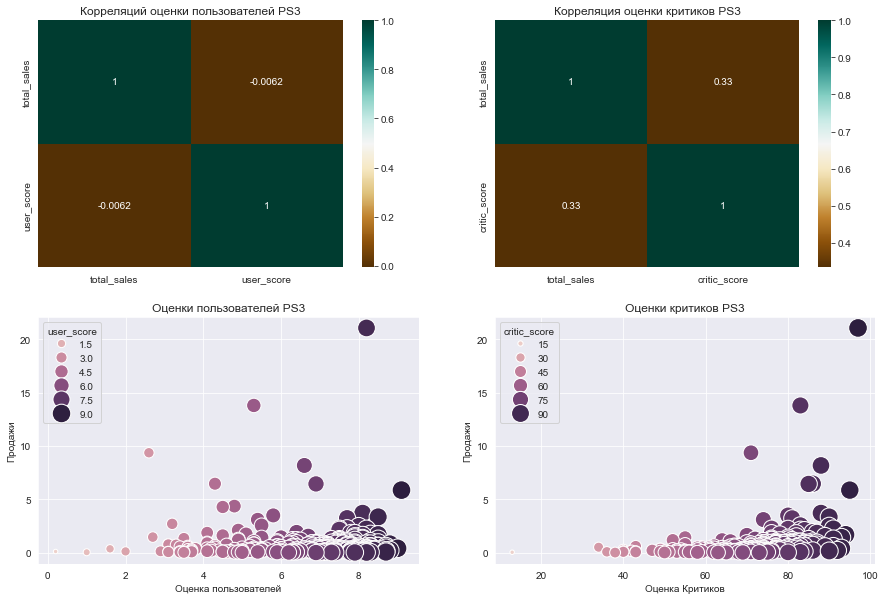

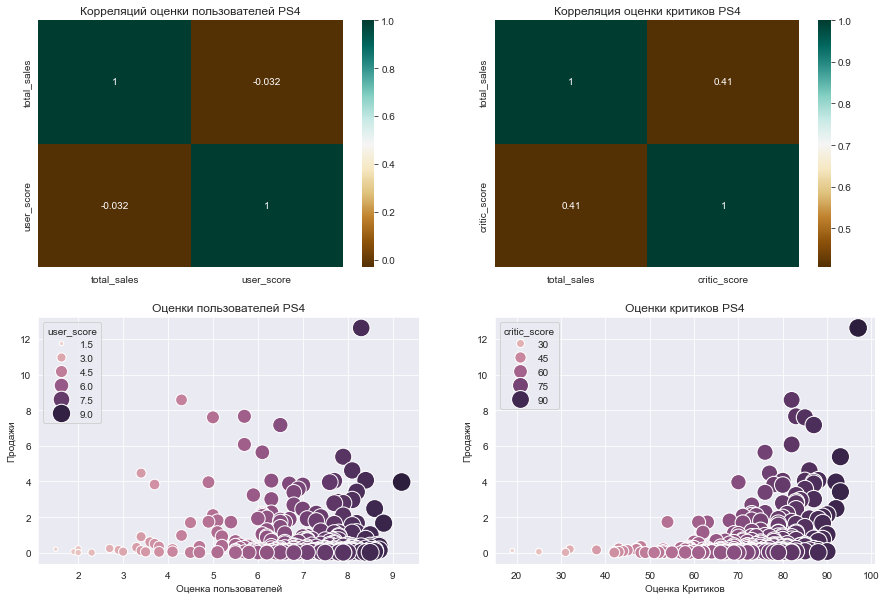

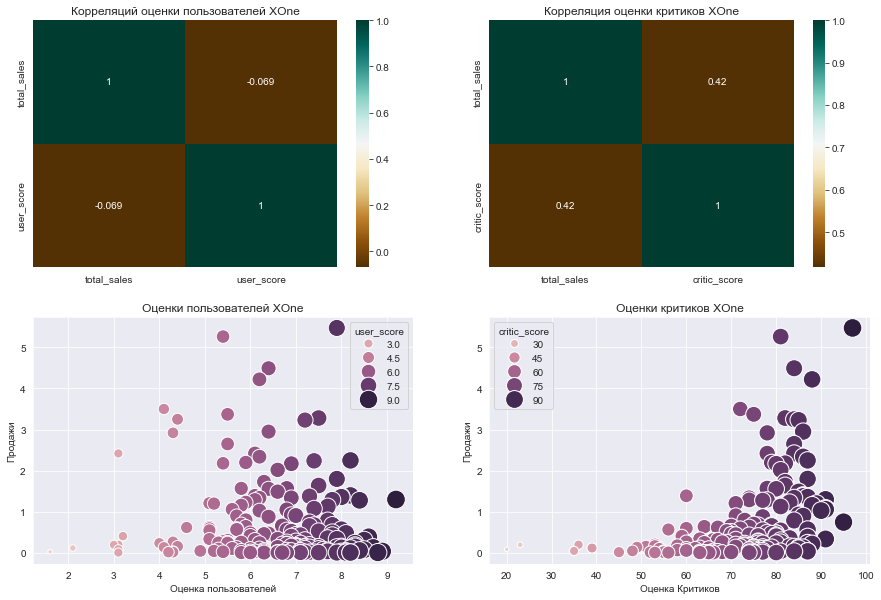

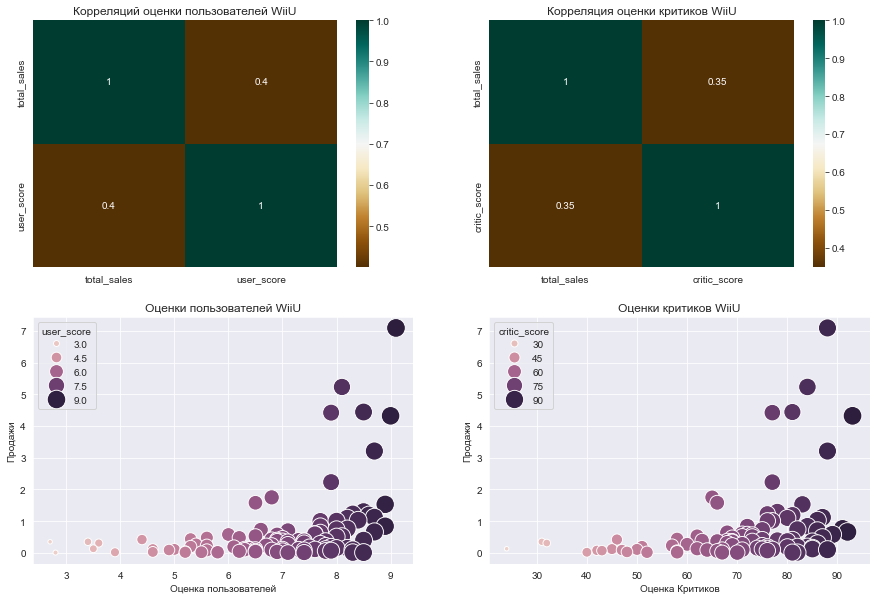

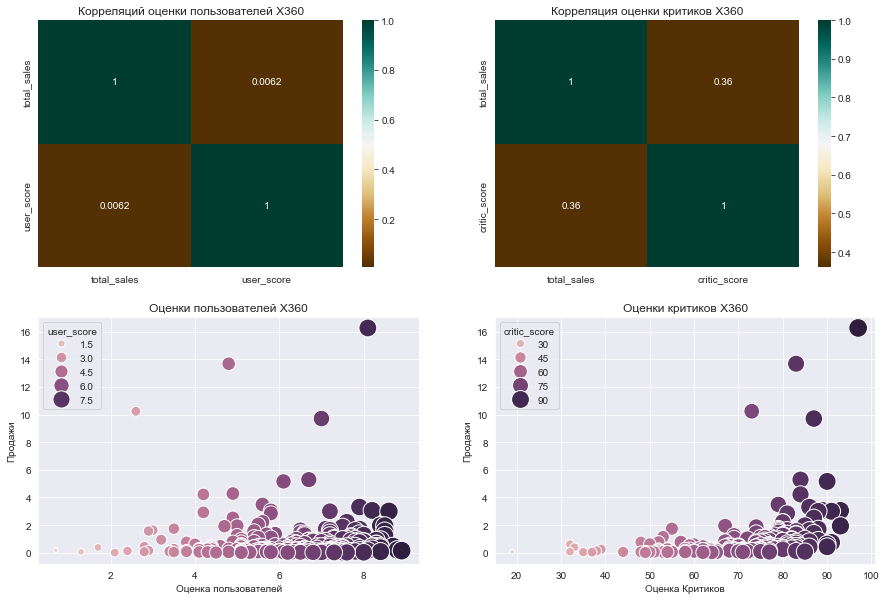

In [34]:
temp = ('PS3', 'PS4', 'XOne', 'WiiU', 'X360')
for t in temp:
    corr_func(t)

**Корреляци для всех жанров составляла 0.0042 для оценки пользователей и 0.31 для оценки критиков.**

**Корреляция оценки пользователей у топовых платформ около нулевая, кроме платформы `WiiU`.**

**Корреляция оценка критиков у топовых платформ чуть больше чем у всех платформ**

**Сравнивая с другими топовыми площадками, можно выделить платформу `WiiU` где корреляция пользователей и критиков примерно равна и отличается от общей картины корреляций 0.4 для пользователей и 0.35 для критиков, т.е. на платформе `WiiU` есть средняя зависимость между оценками критиков и пользователей к продажам. Т.е. на платформе `WiiU` самая сильная зависимость между оценкой пользователей и продажами.**
 
 **У платформ `PS4` и `XOne` корреляция критиков чуть больше влияет на продажи имеет коофициент 0.41 и 0.42. Но коэфициент пользователей такой же слабы как и в общей картине, -0,039 и -0,069.**

### <font color='DarkBlue'><b>3.8 Посмотрим на общее распределение игр по жанрам.</b></font>

 - *Делаем сводную таблицу по топовым играм в соотношении к доходу и топовое кол-во игр по жанрам:*

In [35]:
top_games = (actual_data.pivot_table(index=['genre','name'],
                                            values=['platform','total_sales'], 
                                            aggfunc ={'platform' : 'count', 'total_sales' : 'sum'})
                                            .sort_values(by='total_sales', ascending=False)
                                            .reset_index())
top_20_games_revanue = top_games.head(20)
top_20_games_revanue = top_20_games_revanue.sort_index(ascending=False)

 - *Отображаем топ-20 игр на графике, в зависимости от их дохода:*

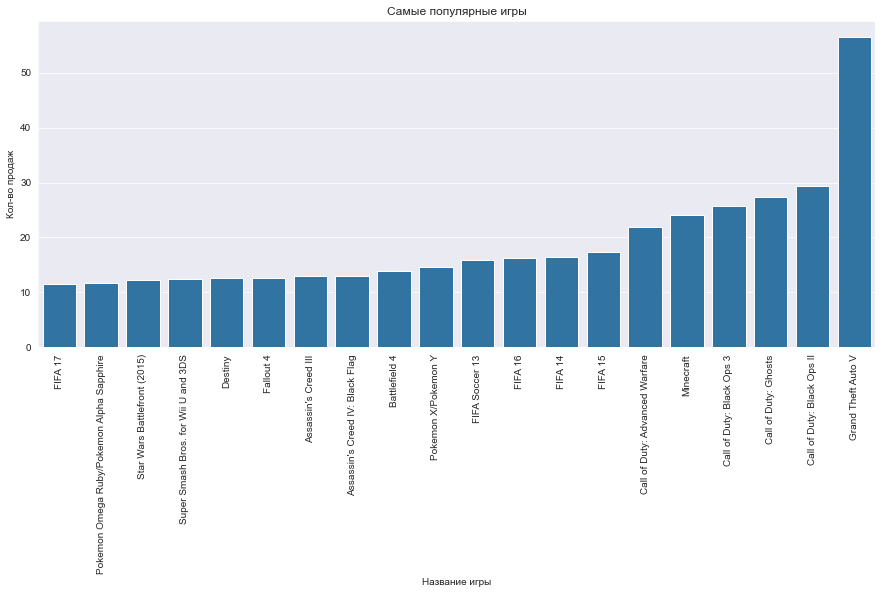

In [41]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 6))
(sns.barplot(data=top_20_games_revanue , x='name', y='total_sales')
            .set(title='Самые популярные игры', xlabel='Название игры', ylabel='Кол-во продаж'))
plt.xticks(rotation=90)
plt.show()

**С перевесом в 2 раза, наиболее доходная игра является Grand Theft Auti V, известная как GTA. Дальше идет трилогия Call of Duty, чуть дальше 3 части FIFA 14 15 16 года. К слову FIFA 17 сильно остает по продажам, возможно от того что она только недавно вышла**

 - *Строим сводную таблицу по топовым жанрам:*

In [42]:
top_genre = (actual_data.pivot_table(index='genre', 
                                     values=['name','total_sales'], 
                                     aggfunc = {'name' : 'count', 'total_sales' : 'median'})
              .sort_values(by='name', ascending=False)
              .reset_index())

 - *Строим график, с сортировкой от менее популярного жанра, к более популярному:*

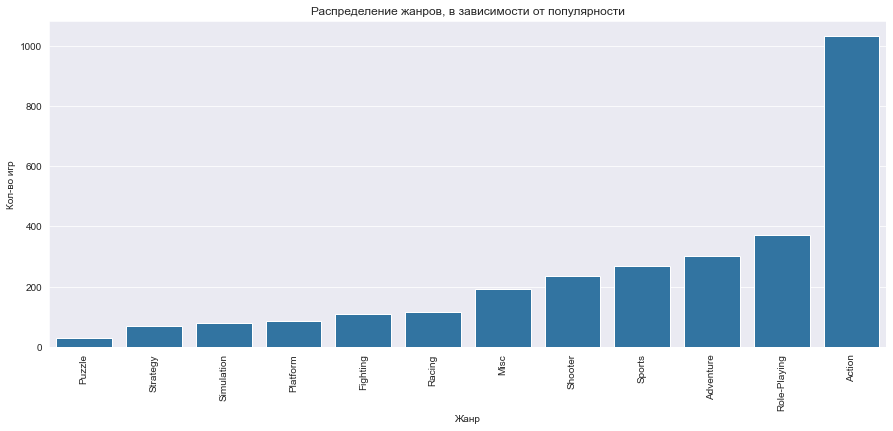

In [43]:
top_genre = top_genre.sort_index(ascending=False)
sns.set_style('darkgrid')
plt.figure(figsize=(15, 6))
(sns.barplot(data=top_genre, x='genre', y='name')
            .set(title='Распределение жанров, в зависимости от популярности',
                xlabel='Жанр', ylabel='Кол-во игр'))
plt.xticks(rotation=90)
plt.show()

**Самым популярным жанром является Action, это жанр компьютерных игр, в котором делается упор на эксплуатацию физических возможностей игрока, таких как зрительно-моторная координация и скорость реакции. Менее популярные игры в категории puzzle.**

 - *Строим график, с сортировкой по общим продажам, в зависимости от жанра:*

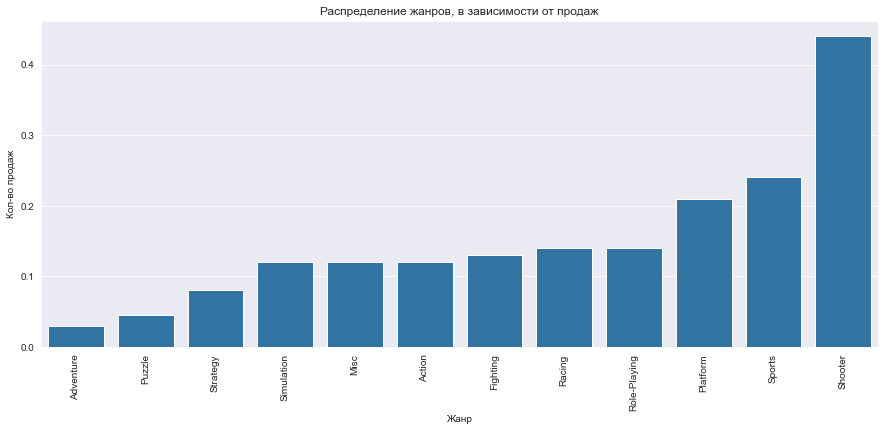

In [45]:
top_genre = top_genre.sort_values(by='total_sales', ascending=True)
sns.set_style('darkgrid')
plt.figure(figsize=(15, 6))
(sns.barplot(data=top_genre, x='genre', y='total_sales')
             .set(title='Распределение жанров, в зависимости от продаж',
                  xlabel='Жанр', ylabel='Кол-во продаж'))
plt.xticks(rotation=90)
plt.show()

 - **Если сравнивать с графиком выше, то самый популярный жанр `Action` приносит не так много прибыли, оказавшись на 7 месте.** 
 - **На 1 месте оказался жанр `Shooter`, который по популярности находится на 5 месте.**
 - **На 2 месте жанр `Sports`, по популярности он находится на 3 месте.** 
 - **На 3 месте находится жанр `Platfrom`, хотя по популярности он находится на 9 месте.**

## <font color='DarkBlue'><b>Шаг 4. Составим портрет пользователя каждого региона</b></font>
Определим для пользователя каждого региона (NA, EU, JP):

 * 4.1 Самые популярные платформы (топ-5). 
 * 4.2 Самые популярные жанры (топ-5). 
 * 4.3 Узнаем влияет ли рейтинг ESRB на продажи в отдельном регионе.

### <font color='DarkBlue'><b>4.1 Самые популярные платформы (топ-5).</b></font>

- *Делаем своднуб таблицу популярных платформ по всем регионам и выводим таблицу отдельно для каждого региона:*

In [46]:
all_platform = (actual_data.pivot_table(index='platform', values=['na_sales','eu_sales', 'jp_sales'], aggfunc='sum')
                        .sort_values(by='na_sales', ascending=False)
                        .reset_index())

na_region_top5_platform = all_platform.loc[:,['platform', 'na_sales']].head(5)
na_region_top5_platform.loc[len(na_region_top5_platform.index)] = ['Others', all_platform.loc[5:10,'na_sales'].sum()]
na_region_top5_platform = na_region_top5_platform.sort_values(by='na_sales', ascending=False)

all_platform = all_platform.sort_values(by='eu_sales', ascending=False)
eu_region_top5_platform = all_platform.loc[:,['platform', 'eu_sales']].head(5)
eu_region_top5_platform.loc[len(eu_region_top5_platform.index)] = ['Others', all_platform.loc[5:10,'eu_sales'].sum()]
eu_region_top5_platform = eu_region_top5_platform.sort_values(by='eu_sales', ascending=False)

all_platform = all_platform.sort_values(by='jp_sales', ascending=False)
jp_region_top5_platform = all_platform.loc[:,['platform', 'jp_sales']].head(5)
jp_region_top5_platform.loc[len(jp_region_top5_platform.index)] = ['Others', all_platform.loc[5:9,'jp_sales'].sum()]
jp_region_top5_platform = jp_region_top5_platform.sort_values(by='jp_sales', ascending=False)

 - *Строим графики для всех регионов и для регионов отдельно, самые популярные платформы:*

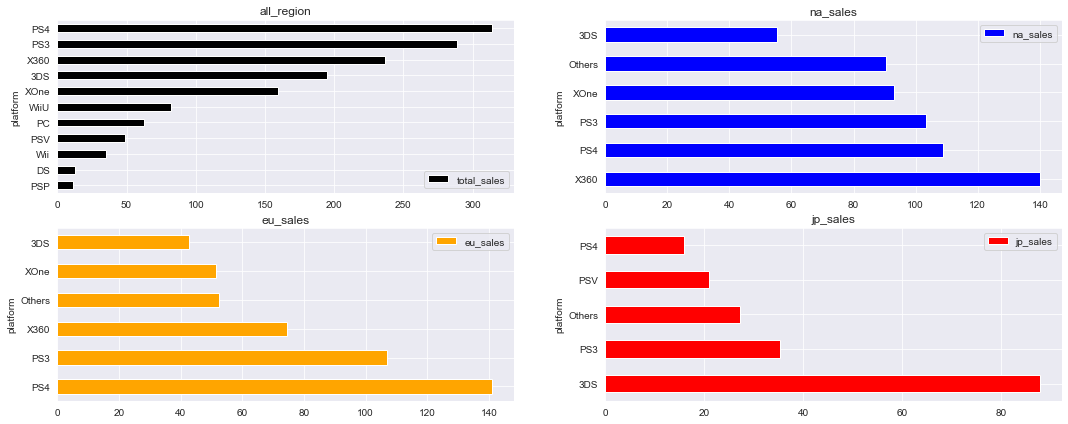

In [48]:
fig, axis = plt.subplots(2,2, figsize=(18,7))

actual_total_sales.plot.barh(ax=axis[0,0], x='platform',color='black').set(title='all_region')
na_region_top5_platform.plot.barh(ax=axis[0,1], x='platform',color='blue').set(title='na_sales')
eu_region_top5_platform.plot.barh(ax=axis[1,0], x='platform',color='orange').set(title='eu_sales')
jp_region_top5_platform.plot.barh(ax=axis[1,1], x='platform',color='red').set(title='jp_sales')
plt.show()

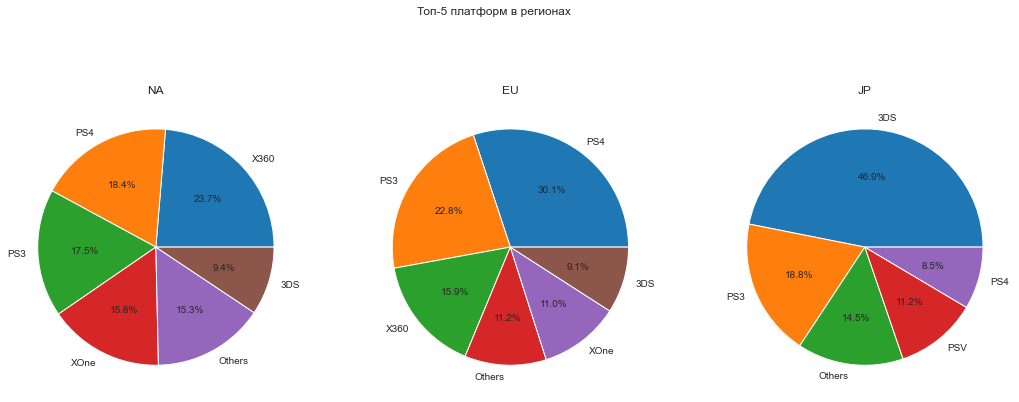

In [49]:
fig, axis = plt.subplots(1,3, figsize=(18,7))
fig.suptitle('Топ-5 платформ в регионах')

(na_region_top5_platform.plot.pie(y='na_sales', labels=na_region_top5_platform.platform,
                               autopct='%1.1f%%',ax=axis[0], legend = '')
                              .set(title='NA', ylabel='')
)


(eu_region_top5_platform.plot.pie(y='eu_sales', labels=eu_region_top5_platform.platform,
                               autopct='%1.1f%%',ax=axis[1], legend = '')
                               .set(title='EU', ylabel='')
)

(jp_region_top5_platform.plot.pie(y='jp_sales', labels=jp_region_top5_platform.platform,
                                    autopct='%1.1f%%',ax=axis[2], legend = '')
                                    .set(title='JP', ylabel='')
)
plt.show()

**Регион америки, na_region:**

*В na регионе лидирует Х360 площадка, из построенного выше графика видно что Х360 платформа на 3 месте и значительно уступала платформам PS4 и PS3, а в этом региона X360 уверенно лидирует. На 2 и 3 месте PS4 и PS3, на 4 месте платформа XOne, и на последнем месте все остальные платформы вместе взятые*

**Регион европы, eu_region:**

*В eu регионе уверенно лидирует PS4, на втором месте PS3 на третьем месте X360. Такое же распределение и в общей картине лидеров. В общем-то распределение очень похоже на распределение для всех регионов, только XOne и 3DS поменялись местами в eu регионе*

**Регион японии, jp_region:**

*В jp регионе картика совсем отличается от общей картины и других регионов, тут уверенно лидирует 3DS, на втором месте PS3, на 3 месте все остальные платформы, на 4 месте PSV,  на 5 месте PS4.*

### <font color='DarkBlue'><b>4.2 Самые популярные жанры (топ-5).</b></font>

 - *Делаем сводную таблицу популярных жанров по всем регионам и выводим таблицу отдельно для каждого региона:*

In [50]:
all_genre = (actual_data.pivot_table(index='genre', values=['na_sales','eu_sales', 'jp_sales'], aggfunc='sum')
                        .sort_values(by='na_sales', ascending=False)
                        .reset_index())

na_region_top5_genre = all_genre.loc[:,['genre', 'na_sales']].head(5)
na_region_top5_genre.loc[len(na_region_top5_genre.index)] = ['Othres', all_genre.loc[5:11,'na_sales'].sum()]
na_region_top5_genre = na_region_top5_genre.sort_values(by='na_sales', ascending=False)

all_genre = all_genre.sort_values(by='eu_sales', ascending=False)
eu_region_top5_genre = all_genre.loc[:,['genre', 'eu_sales']].head(5)
eu_region_top5_genre.loc[len(eu_region_top5_genre.index)] = ['Othres', all_genre.loc[5:11,'eu_sales'].sum()]
eu_region_top5_genre = eu_region_top5_genre.sort_values(by='eu_sales', ascending=False)

all_genre = all_genre.sort_values(by='jp_sales', ascending=False)
jp_region_top5_genre = all_genre.loc[:,['genre', 'jp_sales']].head(5)
jp_region_top5_genre.loc[len(jp_region_top5_genre.index)] = ['Othres', all_genre.loc[5:11,'jp_sales'].sum()]
jp_region_top5_genre = jp_region_top5_genre.sort_values(by='jp_sales', ascending=False)

 - *Строим графики для всех регионов и для регионов отдельно, самые популярные жанры:*

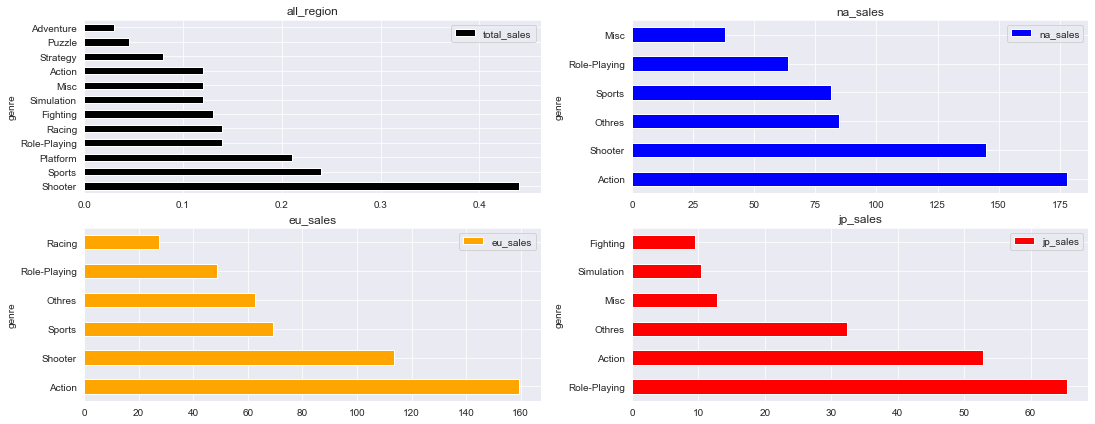

In [51]:
fig, axis = plt.subplots(2,2, figsize=(18,7))

top_genres = top_genre.loc[:,['total_sales','genre']].sort_values(by='total_sales', ascending=False)
top_genres.plot.barh(ax=axis[0,0], x='genre',color='black').set(title='all_region')
na_region_top5_genre.plot.barh(ax=axis[0,1], x='genre',color='blue').set(title='na_sales')
eu_region_top5_genre.plot.barh(ax=axis[1,0], x='genre',color='orange').set(title='eu_sales')
jp_region_top5_genre.plot.barh(ax=axis[1,1], x='genre',color='red').set(title='jp_sales')
plt.show()

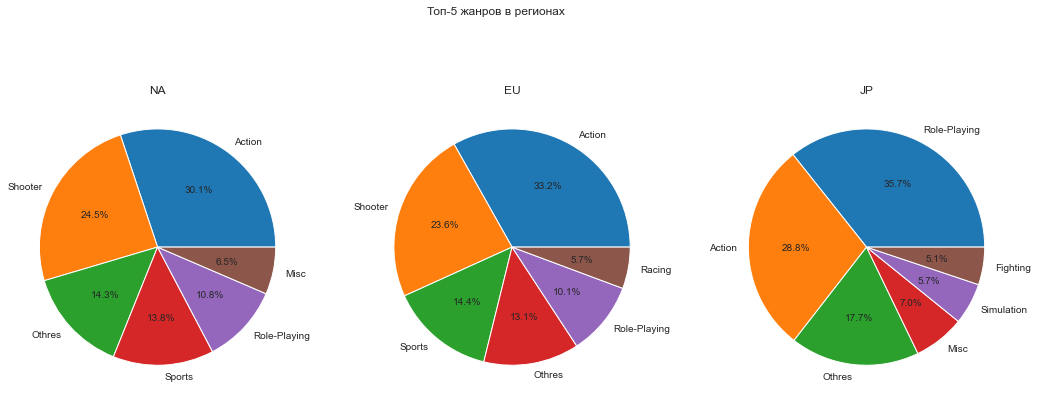

In [52]:
fig, axis = plt.subplots(1,3, figsize=(18,7))
fig.suptitle('Топ-5 жанров в регионах')

(na_region_top5_genre.plot.pie(y='na_sales', labels=na_region_top5_genre.genre,
                               autopct='%1.1f%%',ax=axis[0], legend = '')
                              .set(title='NA', ylabel='')
)


(eu_region_top5_genre.plot.pie(y='eu_sales', labels=eu_region_top5_genre.genre,
                               autopct='%1.1f%%',ax=axis[1], legend = '')
                               .set(title='EU', ylabel='')
)

(jp_region_top5_genre.plot.pie(y='jp_sales', labels=jp_region_top5_genre.genre,
                                    autopct='%1.1f%%',ax=axis[2], legend = '')
                                    .set(title='JP', ylabel='')
)


plt.show() 

**Регион америки, na_region:**

*В na регионе лидирует action, с долей продаж 175 млн, да втором месте shooter, с долей продаж 145млн, на третьем место с большим разрывом идут игры жанра sports, с долей продаж в 80 млн. На 4 и 5 месте Role-Playing и Misc. Если сравнивать с общей картиной, то топ-5 всех регионов повторяют топ-5 na региона, за исключением того что Sports и Role-Playing поменялись местами.*

**Регион европы, eu_region:**

*В eu регионе картика очень похожа на na регион, только обьем продаж меньше и на 5 месте у eu региона  стоит Racing, а не Misc как в na регионе. Так лидирует жанр action, доля продаж 160 млн, на втором месте shooter 110 млн продаж. На 3 месте Sports, доля продаж около 70 млн. Далее на 4 месте, Role_playing жанр с долей продаж в 50 млн. В сравнении с общей таблицей, можно увидеть что первые 4 места совпадают с рейтингом общей таблицы, за исключением того что Sports и Role-Playing поменялись местами, а также на 5 месте Racing, который в общей таблице на 7 месте. Это значит что в eu регионе меньше играют в жанры Sports и Misc.*

**Регион японии, jp_region:**

*В jp регионе картика совсем отличается от общей картины и других регионов, на 1 месте Role-Playing, причем доля составляет 65 млн, при том что общее кол-во продаж на всех плтаформах примерно 180 млн, т.е. треть продаж приходится на jp регион, на втором месте action, на 3 месте с огромным разрывом в продажах нежели у 2 места, misc с долей продаж 11 млн. На 4 и 5 месте Simulation и Fithing c долей продаж  около 10млн на каждый жанр. Role-playing который в общей таблице на 3 месте, в jp регионе уверенно лидирует. Simulation который где-то в конце жанров из общей таблицы, в jp регионе занимает 4 месте и составляет треть продаж от общей доли.*

### <font color='DarkBlue'><b>4.3 Узнаем влияет ли рейтинг ESRB на продажи в отдельном регионе.</b></font>

- *Отобразим кол-во продаж и рейтинги:*

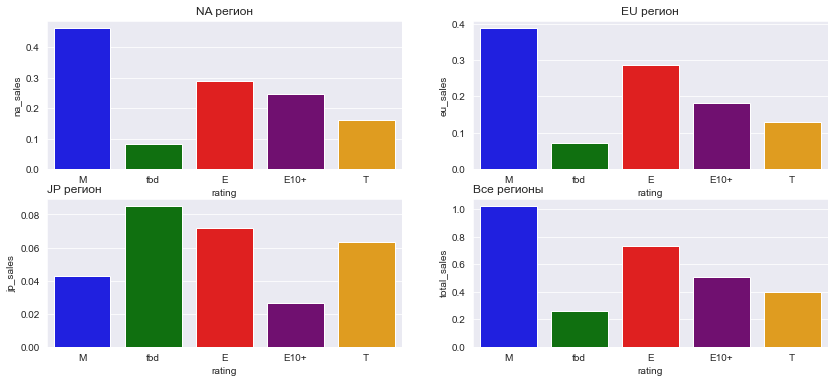

In [60]:
colors = ['blue', 'green', 'red', 'purple', 'orange']

fig, axis = plt.subplots(2,2, figsize=(14,6))


sns.barplot(y='na_sales', x='rating', data=actual_data, ax=axis[0,0], hue='rating', palette=colors, legend=False, errorbar=None)
axis[0,0].set_title('NA регион')
sns.barplot(y='eu_sales', x='rating', data=actual_data, ax=axis[0,1], hue='rating', palette=colors, legend=False, errorbar=None)
axis[0,1].set_title('EU регион')
sns.barplot(y='jp_sales', x='rating', data=actual_data, ax=axis[1,0], hue='rating', palette=colors, legend=False, errorbar=None)
axis[1,0].set_title('JP регион', loc='left')
sns.barplot(y='total_sales', x='rating', data=actual_data, ax=axis[1,1], hue='rating', palette=colors, legend=False, errorbar=None)
axis[1,1].set_title('Все регионы', loc='left')

plt.show()

**Обозначение букв рейтинга:**
 - E - Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика.
 - T - Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия.
 - M - Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков.
 - E10+ - Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей.
 - tbd - рейтинг не известен*

**Исходя из обозначений рейтинга наиболее продоваемые игры с рейтингом М, т.е. игры для лиц старше 17 лет. На 2 месте с рейтингом E. Игра для всех возрастных категорий. Отличия этих категорий в возрастном ограничении и то что в М категории нет ценцуры, а в Е категории есть цензура. На 3 месте Е10+,  кроме jp региона, там на 3 месте Т рейтинг. И еще отличие jp региона от других, в том что у них больше всего продаж игр с неизвестным рейтингом, скорее всего потому что там своя рейтинговая система, отличающаяся от остальных регионов.
Из этого всего, можно сказать что рейтинг влияет на продажи. Т.е. у jp региона лучше всего продаются игры без рейтинга, в остальных регионах с рейтингом М.**

## <font color='DarkBlue'><b>Шаг 5. Проверяем гипотезы.</b></font>

 - 5.1 О том что средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - 5.2 О том что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### <font color='DarkBlue'><b>5.1 О том что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.</b></font>

 - *Создаем переменные для гипотезы:*

In [61]:
platform_XOne = actual_data.query('platform == "XOne" & user_score != -1')
platform_PC = actual_data.query('platform == "PC" & user_score != -1')

*Здесь следует применить ттест, т.к. исследуемые выборки не зависими друг от друга*

*За `нулевую гипотезу` принимает то, что средний пользовательский рейтинг между платформами XOne и PC. За `альтернативную гипотезу` берем то, что эти платформы не равны. Статистическое значение задаем 5%. 
По итогам ттеста принимаем нулевую гипотезу. Это значит что средний ретинг пользователей равен между этими платформами*
- *Проводим ттест для проверки гипотезы:*

In [62]:
alpha = .05
results = st.ttest_ind(platform_XOne.user_score, 
                       platform_PC.user_score)

print('Значени p-value:',round(results.pvalue, 3))
if (results.pvalue < alpha):
    print('Принимаем альтернативную гипотезу')
else:
    print('Принимаем нулевую гипотезу')
    
print('Средний показатель оценки пользователей (XOne платформа)', platform_XOne.user_score.mean())
print('Средний показатель оценки пользователей (PC платформа)', platform_PC.user_score.mean())

Значени p-value: 0.554
Принимаем нулевую гипотезу
Средний показатель оценки пользователей (XOne платформа) 6.521428571428572
Средний показатель оценки пользователей (PC платформа) 6.4286407766990274


**В ходе проверки гипотезы нам нужно было узнать, равны ли рейтинги пользователей между платформами XOne и PC. По результатам проведения гипотезы, приняли нулевую гипотезу, которая говорит о том что рейтинг пользователей между платформами XOne и PC одинаковые. В этом можно убедиться путем сравнения средних значений этих платформ, 6.5 и 6.43**

### <font color='DarkBlue'><b>5.2 О том что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.</b></font>

 - *Создаем переменные для гипотезы:*

In [63]:
genre_Action = actual_data.query('genre == "Action" & user_score != -1')
genre_Sports = actual_data.query('genre == "Sports" & user_score != -1')

*Здесь следует применить ттест, т.к. исследуемые выборки не зависими друг от друга*

*Т.к. нам нужно узнать разные ли рейтинги жанров мы применим двустороннюю проверку гипотез, за `нулевую гипотезу` принимает то, что средний пользовательский рейтинг между жанрами Action и Sports равные. За `альтернативную гипотезу` берем то, что эти платформы не равны. Статистическое значение задаем 5%.*
 - *Проводим ттест для проверки гипотезы:*

In [64]:
alpha = .05
results = st.ttest_ind(genre_Action.user_score, 
                       genre_Sports.user_score)

print('Значени p-value:', results.pvalue)
if (results.pvalue < alpha):
    print('Принимаем альтернативную гипотезу')
else:
    print('Принимаем нулевую гипотезу')
    
print('Средний показатель оценки пользователей (Action жанра)', genre_Action.user_score.mean())
print('Средний показатель оценки пользователей (Sports жанра)', genre_Sports.user_score.mean())

Значени p-value: 4.8045233804629176e-26
Принимаем альтернативную гипотезу
Средний показатель оценки пользователей (Action жанра) 6.825047801147227
Средний показатель оценки пользователей (Sports жанра) 5.455670103092784


**По итогам ттеста принимаем альтернативную гипотезу. Это значит что средний ретинг пользователей равен между этими платформами не равен, т.е. в каком-то жанре он выше, в какой-то ниже. Приведя средние значения жанров, можно убедиться в том, что средний показатель оценок пользователей не равне у этих двух жанров. У жанра Sports он на порядок выше, поэтому принимает альтернативную гипотезу, о том что рейтинги пользователей не равны.**

## <font color='DarkBlue'><b>6 Выводы и рекомендации</b></font>

В данном проекте получили файл с данными с 1980 по 2016 год. Подгрузили нужные модули. Провели общий осмотр данных, вывели информацию, посмотрели типы данных, названия столбцов. 

 **В предобработке данных:**
 - Вывели общий размер файла, составил 16715 строк.
Далее обработали пропуски, вывели на диаграмму наличие пропусков. Нашли 2 пропуска в столбце Name, 269 в столбце year_of_release, 8578 пропусков в critic_score, 6701 пропусков в user_score, 6766 пропусков в rating. Посмотрели наличие дубликатов и не вывили дубликатов. Удалили данные по пропускам в year_of_release и 2 пропуска в name. Остальные пропуски заполнили 0, critic_score и user_score, в rating пропуски заполнили tbd. Посмотрели

После добавили новый столбец с названием total_sales, где мы сложили доходы по всем регионам.

 **Исследовательский анализ данных:**
 - Вывели кол-во выпускаемых игр, где можно проследить закономерности роста и падения, т.е. есть определенное кол-во лет, на протяжении которого индустрия игр находится на, примерно, одном уровне. Так можно увидеть начиная с 1998 года до 2001, было положено начало роста выхода игр, далее с 2002 года по 2006 следующий скачек и примерно одинаковый уровень выхода и продаж игр, дальше с 2007 по 2011 год был еще больший рост выхода и продаж игр, рекордный за весь период предоставленных нам данных, далее проихошел резский спад производства и продаж игр, и кол-во это сократилось меньше чем было в 2007-2011 году, с 2012 по 2016 год начался новый виток. Исходя из этого можно увидеть закономерность, что тренды на игры меняются циклами в 5 лет, поэтому было решено взять анализируемы период с 2012 по 2016 год.
 - Выяснили что средний срок жизни платформы 7 лет и из построенного графика видно, что когда закрывется одна платформе в следующий год обязательно открывается другая платформа. Так же выяснили что площадка PC, самая продолжительная по сроку жизни площадка, 21 год.
 - Посмотрели тенденцию роста или падения по годам и выяснили что самый успешный год оказался 2013 и 2014, 2015 и 2016 менее прибыльные оказались, но стоит учитывать что за 2016 год данные не полные.
 - Топ-5 платформа оказались PS4 PS3 X360 3DS XOne.
 - Выяснили что огромную прибыль в 2013 году принесла игра Grand Theft Auto V. На 2 месте серия игры от Call of Duty. Call of duty продавался в разные периоды с 2012 по 2015 год.
 - Дальше проверили зависимость оценок критиков и пользователей с общими продажами и выяснили что оценки пользователей ни как не влияют на общие продажи, в то время как оценки критиков имеют некоторое влияни на продажи игр.
 - Выяснили что самым прибыльными играми за период с 2012 по 2016 год были: Grand Theft Auti V, серия из Call of Duty, Minecraft, серия игр FIFA
 - Выяснили, что самые популярные жанры это Action, причем опережает сильно все остальные жанры,  далее идет Role-Playing, Adventure, Sports, Shooter и Misc
 - Выяснили что самые прибыльные жанры это Shooter, на 2 месте Sports, на 3 месте Platform, на 4 месте Role-Playing на 5 месте Racing.
 - Дальше разбили прибыль по регионам и построили графики для каждого отдельного региона и отдельно для всех, что бы было наглядно видно. Так выяснили что NA регионе лидирует площака X360, в EU регионе лидирует PS4, в JP регионе  лидирует 3DS. Видно что в разных регионах разные платформы лидеры.
 - Посмотрели жанры которые больше всего принят продаж в каждом отдельно регионе. Так в NA регионе более популярный Shooter, в eu регионе почти одинаково принесли продаж, action и shooter, в jp регионе уверенно лидирует Role_playing жанр.
 - Выяснили зависимость между рейтингом игры и их продаваемостью, так выяснили что более продаваемые игры с рейтингом М, по всем регионам кроме JP, игры с этим рейтингом уверенно лидируют. На 2 месте игры с рейтингом Е, при этом этот рейтинг характерен для всех регионов, будучи на 2 месте.
 
 **Проверили 2 гипотезы и выяснили что:**
 
 - средний пользовательский рейтинг у площадок PC и XOne совпадает. Притом что кол-во продаж у XOne 150 млн, а у PC 50 млн, пользователи одинаково довольны покупая игры на этих площадках.
 - средний пользовательский рейтинг между жанрами Action и Sports не равен.
 
 
 **Рекомендации:**
 - Однозначно стоит смотреть на отрезки времени, т.е. каждые 5 лет тренды меняются и продажи в целом или падают или поднимаются, причем это происходит ощутимо, не планомерно. Учитывая что на момент 2016 года уже прошел цикл 5 лет и то что период с 2012 по 2016 год, по продажам хуже чем период с 2002 по 2011, можно предположить, что начиная с 2017 года будет рост производства игр и соответственно кол-во продаж увеличиться. Это стоит учитывать при планировании рекламной компании.
 - Так же стоит обращать внимание на оценки критиков, т.к. от них есть, хоть и не сильная зависимость, но средняя, это значит что в каких то случаях оценки критиков влияют на продажи, так если оценка критиков не поднимается в среднем выше 60 балов из 100, стоит с осторожностью вкладывать в эту игру рекламные ресурсы.
 - Из всего выше написаного и построеных всех графиков:
  - самый прибильный жанр Shooter.
  - самые прибыльные игры это Fifa и Call of Duty, хоть Grand Theft Auto V имеет самые большие продажи, это было всего лишь в одном году, сейчас на это нельзя оринетироваться.
  - платформы где больше других продаются самые продаваемы жанры это XOne PS4
  - лучше всего продаются игры с рейтингом М
  - Регион NA более предпочтителен, нежели EU. В NA регионе больше обьем продаж